In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("disaster_data - Sheet1.csv")

In [4]:
df.head()

DisNo. Classification Key    Event Name           ISO       Country  \
0   StringFilter       StringFilter  StringFilter  StringFilter  StringFilter   
1  2016-0001-POL    nat-met-ext-col           NaN           POL        Poland   
2  2016-0001-UKR    nat-met-ext-col           NaN           UKR       Ukraine   
3  2016-0002-BGD    nat-geo-ear-gro           NaN           BGD    Bangladesh   
4  2016-0002-IND    nat-geo-ear-gro           NaN           IND         India   

        Subregion          Region  \
0       CSVFilter  CategoryFilter   
1  Eastern Europe          Europe   
2  Eastern Europe          Europe   
3   Southern Asia            Asia   
4   Southern Asia            Asia   

                                            Location  \
0                MapsTooltip - Hidden - StringFilter   
1  Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...   
2  Cherkas'ka, Chernihivs'ka, Chernivets'ka, Dnip...   
3  Dhaka, Jamalpur districts (Dhaka province), Ra...   
4  Guwahati city (Kamrup district, Assam province...   

                      Latitude                     Longitude  ...  \
0  MapsLat - Hidden - NoFilter  MapsLong - Hidden - NoFilter  ...   
1                   51.7592924                    19.4558778  ...   
2                   46.9660801                     32.003246  ...   
3                   24.3746497                    88.6003665  ...   
4                   26.1653859                    91.7380647  ...   

  Reconstruction Costs ('000 US$) Reconstruction Costs, Adjusted ('000 US$)  \
0                    StringFilter                              StringFilter   
1                             NaN                                       NaN   
2                             NaN                                       NaN   
3                             NaN                                       NaN   
4                             NaN                                       NaN   

  Insured Damage ('000 US$) Insured Damage, Adjusted ('000 US$)  \
0              StringFilter                        StringFilter   
1                       NaN                                 NaN   
2                       NaN                                 NaN   
3                       NaN                                 NaN   
4                     75000                               95216   

  Total Damage ('000 US$)                  Total Damage, Adjusted ('000 US$)  \
0          CategoryFilter                                       StringFilter   
1               78.767923  [{"adm1_code":2370,"adm1_name":"Dolnoslaskie"}...   
2               78.767923  [{"adm1_code":3148,"adm1_name":"Cherkas'ka"},{...   
3               78.767923  [{"adm2_code":5778,"adm2_name":"Dhaka"},{"adm2...   
4               78.767923  [{"adm2_code":17583,"adm2_name":"Kamrup"},{"ad...   

            CPI   Admin Units      Entry Date Last Update  
0  StringFilter  StringFilter  CategoryFilter         NaN  
1    2016-01-12    2023-09-25             NaN         NaN  
2    2017-03-31    2023-09-25             NaN         NaN  
3    2016-01-12    2023-09-25             NaN         NaN  
4    2016-01-12    2023-09-25             NaN         NaN  

[5 rows x 35 columns]

In [5]:
def explore_data(df):
    pd.set_option('display.max_rows',100)
    pd.set_option('display.max_columns',100)

    #Get the basic information about the dataframe
    print("Data Shape:")
    print(df.shape)

    print("\nData Columns:")
    print(df.columns)
    
    #To print columns with null values
    print("\nColumns with null values\n")
    null_counts=df.isnull().sum()
    features_with_null=null_counts[null_counts>0].index
    print(features_with_null)
    
    print("\nData Info:\n")
    print(df.info())
    
    #Check for missing values
    print("\nMissing values:\n")
    print(df.isnull().sum())
    
    #Check for duplicate rows
    print("\nDuplicate rows\n:")
    print(df.duplicated().sum())
    
    #Explore unique values in all columns
    print("\nUnique values in all columns\n:")
    print(df.nunique())
    
explore_data(df)

Data Shape:
(4317, 35)

Data Columns:
Index(['DisNo.', 'Classification Key', 'Event Name', 'ISO', 'Country',
       'Subregion', 'Region', 'Location', 'Latitude', 'Longitude',
       'OFDA/BHA Response', 'Appeal', 'Declaration', 'Magnitude',
       'Magnitude Scale', 'Start Year', 'Start Month', 'Start Day', 'End Year',
       'End Month', 'End Day', 'Total Deaths', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')

Columns with null values

Index(['Event Name', 'Location', 'Latitude', 'Longitude', 'Magnitude',
       'Magnitude Scale', 'Start Month', 'Start Day', 'End Month', 'End Day',
       'Total Deaths', 'No. Affected', 'No. Homeless', 'Total Affected',
       'Rec

In [6]:
# Magnitude                                    4010
#Magnitude Scale 
#No. Homeless                                 4301
#Total Affected                               4301
#Reconstruction Costs ('000 US$)              4166
#Reconstruction Costs, Adjusted ('000 US$)    4179
#Insured Damage ('000 US$)                    3451
#Insured Damage, Adjusted ('000 US$)          3492
#CPI                                             0
#Admin Units
#Entry Date                                   4316
#Last Update                                  4317

In [7]:
# Unique values of these columns are 1
df=df.drop(['Magnitude','Magnitude Scale','No. Homeless','Total Affected',
            'CPI','Admin Units','Entry Date','Last Update'],axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317 entries, 0 to 4316
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     4317 non-null   object 
 1   Classification Key                         4317 non-null   object 
 2   Event Name                                 1366 non-null   object 
 3   ISO                                        4317 non-null   object 
 4   Country                                    4317 non-null   object 
 5   Subregion                                  4317 non-null   object 
 6   Region                                     4317 non-null   object 
 7   Location                                   3959 non-null   object 
 8   Latitude                                   3839 non-null   object 
 9   Longitude                                  3839 non-null   object 
 10  OFDA/BHA Response       

In [9]:
df.head(10)

DisNo. Classification Key    Event Name           ISO  \
0   StringFilter       StringFilter  StringFilter  StringFilter   
1  2016-0001-POL    nat-met-ext-col           NaN           POL   
2  2016-0001-UKR    nat-met-ext-col           NaN           UKR   
3  2016-0002-BGD    nat-geo-ear-gro           NaN           BGD   
4  2016-0002-IND    nat-geo-ear-gro           NaN           IND   
5  2016-0003-PAK    tec-tra-roa-roa           NaN           PAK   
6  2016-0004-TON    nat-met-sto-tro  Cyclone Ulla           TON   
7  2016-0005-EGY    tec-tra-wat-wat         Ferry           EGY   
8  2016-0006-GRC    tec-tra-wat-wat      Migrants           GRC   
9  2016-0007-RUS    tec-mis-fir-fir       Factory           RUS   

              Country        Subregion          Region  \
0        StringFilter        CSVFilter  CategoryFilter   
1              Poland   Eastern Europe          Europe   
2             Ukraine   Eastern Europe          Europe   
3          Bangladesh    Southern Asia            Asia   
4               India    Southern Asia            Asia   
5            Pakistan    Southern Asia            Asia   
6               Tonga        Polynesia         Oceania   
7               Egypt  Northern Africa          Africa   
8              Greece  Southern Europe          Europe   
9  Russian Federation   Eastern Europe          Europe   

                                            Location  \
0                MapsTooltip - Hidden - StringFilter   
1  Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...   
2  Cherkas'ka, Chernihivs'ka, Chernivets'ka, Dnip...   
3  Dhaka, Jamalpur districts (Dhaka province), Ra...   
4  Guwahati city (Kamrup district, Assam province...   
5                                     Karak district   
6  Vava'u, Ha'apai islands (Administrative unit n...   
7                            Kafr al-Cheikh province   
8                                          Egean sea   
9                                             Moscou   

                      Latitude                     Longitude  \
0  MapsLat - Hidden - NoFilter  MapsLong - Hidden - NoFilter   
1                   51.7592924                    19.4558778   
2                   46.9660801                     32.003246   
3                   24.3746497                    88.6003665   
4                   26.1653859                    91.7380647   
5                   33.1276716                     71.097317   
6                  -19.7308846                   -174.288444   
7                   31.1106593                    30.9387799   
8                    39.019184                     25.268555   
9                    55.755826                       37.6173   

  OFDA/BHA Response          Appeal   Declaration    Start Year  Start Month  \
0    CategoryFilter  CategoryFilter  StringFilter  StringFilter          NaN   
1                No              No            No          2016          1.0   
2                No              No            No          2016          1.0   
3                No              No            No          2016          1.0   
4                No              No            No          2016          1.0   
5                No              No            No          2016          1.0   
6                No              No            No          2016          1.0   
7                No              No            No          2016          1.0   
8                No              No            No          2016          1.0   
9                No              No            No          2016          1.0   

   Start Day      End Year     End Month       End Day  Total Deaths  \
0  CSVFilter  StringFilter  StringFilter  StringFilter  StringFilter   
1          2          2016             1             4           NaN   
2          1          2016             1            12           NaN   
3          3          2016             1             3           NaN   
4          3          2016             1             3         10500  

In [10]:
pd.set_option('display.max_rows',0)
pd.set_option('display.max_columns',0)

In [11]:
df

DisNo. Classification Key  ... Total Damage ('000 US$)                  Total Damage, Adjusted ('000 US$)
0      StringFilter       StringFilter  ...          CategoryFilter                                       StringFilter
1     2016-0001-POL    nat-met-ext-col  ...               78.767923  [{"adm1_code":2370,"adm1_name":"Dolnoslaskie"}...
2     2016-0001-UKR    nat-met-ext-col  ...               78.767923  [{"adm1_code":3148,"adm1_name":"Cherkas'ka"},{...
3     2016-0002-BGD    nat-geo-ear-gro  ...               78.767923  [{"adm2_code":5778,"adm2_name":"Dhaka"},{"adm2...
4     2016-0002-IND    nat-geo-ear-gro  ...               78.767923  [{"adm2_code":17583,"adm2_name":"Kamrup"},{"ad...
5     2016-0003-PAK    tec-tra-roa-roa  ...               78.767923                                                NaN
6     2016-0004-TON    nat-met-sto-tro  ...               78.767923  [{"adm1_code":2976,"adm1_name":"Administrative...
7     2016-0005-EGY    tec-tra-wat-wat  ...               78.767923                                                NaN
8     2016-0006-GRC    tec-tra-wat-wat  ...               78.767923                                                NaN
9     2016-0007-RUS    tec-mis-fir-fir  ...               78.767923                                                NaN
10    2016-0008-GRC    tec-tra-wat-wat  ...               78.767923                                                NaN
11    2016-0009-MYS    tec-tra-wat-wat  ...               78.767923                                                NaN
...             ...                ...  ...                     ...                                                ...
4305  2024-0782-CUB    nat-met-sto-tro  ...                     NaN                                                NaN
4306  2024-0783-ZAF    nat-hyd-flo-flo  ...                     NaN                                                NaN
4307  2024-0788-USA    nat-hyd-flo-fla  ...                     NaN                                                NaN
4308  2024-9075-COL    nat-cli-dro-dro  ...                     NaN  [{"adm1_code":939,"adm1_name":"Boyaca"},{"adm1...
4309  2024-9131-ZMB    nat-cli-dro-dro  ...                     NaN                                                NaN
4310  2024-9135-MHL    nat-cli-dro-dro  ...                     NaN  [{"adm1_code":2002,"adm1_name":"Administrative...
4311  2024-9197-MWI    nat-cli-dro-dro  ...                     NaN                                                NaN
4312  2024-9197-ZWE    nat-cli-dro-dro  ...                     NaN                                                NaN
4313  2024-9277-VNM    nat-cli-dro-dro  ...                     NaN                                                NaN
4314  2024-9338-NAM    nat-cli-dro-dro  ...                     NaN                                                NaN
4315  2024-9381-GRD    nat-cli-dro-dro  ...                     NaN                                                NaN
4316  2024-9592-AGO    nat-cli-dro-dro  ...                     NaN                                                NaN

[4317 rows x 27 columns]

In [12]:
def impute_eventname(row):
    if pd.isnull(row['Event Name']):
        if row['Classification Key'][:3] == 'tec':
            return 'technology'
        elif row['Classification Key'][:3] == 'nat':
            return 'natural'
    return row['Event Name']

# Apply the function to the 'eventname' column
df['Event Name'] = df.apply(impute_eventname, axis=1)


In [13]:
def impute_location(row):
    if pd.isnull(row['Location']):
        return row['Country']
       
    return row['Location']

# Apply the function to the 'eventname' column
df['Location'] = df.apply(impute_location, axis=1)

In [14]:
df.Location.isnull().sum()

np.int64(0)

In [15]:
import pandas as pd
import numpy as np

# Convert Latitude and Longitude to numeric (coerce errors to NaN)
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# Calculate the median for Latitude and Longitude for each country
medians = df.groupby('Country')[['Latitude', 'Longitude']].median()

# Function to impute missing values with the median values based on the country
def impute_with_median(row):
    if pd.isnull(row['Latitude']) or pd.isnull(row['Longitude']):
        country = row['Country']
        if country in medians.index:
            # Impute with country-specific median if available
            if pd.isnull(row['Latitude']):
                row['Latitude'] = medians.loc[country, 'Latitude']
            if pd.isnull(row['Longitude']):
                row['Longitude'] = medians.loc[country, 'Longitude']
    return row

# Apply the function to each row
df = df.apply(impute_with_median, axis=1)

df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mean())
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mean())

In [16]:
df['End Day'] = pd.to_numeric(df['End Day'], errors='coerce').astype('Int64')
df['Start Day'] = pd.to_numeric(df['Start Day'], errors='coerce').astype('Int64')

In [17]:
df['days'] = df['End Day'] - df['Start Day']

In [18]:
df=df.drop(['Start Day','End Day','Start Year','End Year','Start Month','End Month'],axis=1)

In [19]:
df['Total Deaths'] = df['Total Deaths'].fillna(0)
df['No. Affected'] = df['No. Affected'].fillna(0)

In [20]:
df.isnull().sum()

DisNo.                                          0
Classification Key                              0
Event Name                                      0
ISO                                             0
Country                                         0
Subregion                                       0
Region                                          0
Location                                        0
Latitude                                        0
Longitude                                       0
OFDA/BHA Response                               0
Appeal                                          0
Declaration                                     0
Total Deaths                                    0
No. Affected                                    0
Reconstruction Costs ('000 US$)              4166
Reconstruction Costs, Adjusted ('000 US$)    4179
Insured Damage ('000 US$)                    3451
Insured Damage, Adjusted ('000 US$)          3492
Total Damage ('000 US$)                       407


In [21]:
columns_to_drop = [
    "Reconstruction Costs ('000 US$)",          
    "Reconstruction Costs, Adjusted ('000 US$)",    
    "Insured Damage ('000 US$)",                  
    "Insured Damage, Adjusted ('000 US$)",         
    "Total Damage, Adjusted ('000 US$)"
]

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [22]:
df['Total Damage'] = df["Total Damage ('000 US$)"]
df = df.drop(["Total Damage ('000 US$)"],axis = 1)

In [23]:
df.head(10)

DisNo. Classification Key    Event Name           ISO  ...  Total Deaths  No. Affected  days    Total Damage
0   StringFilter       StringFilter  StringFilter  StringFilter  ...  StringFilter  StringFilter  <NA>  CategoryFilter
1  2016-0001-POL    nat-met-ext-col       natural           POL  ...             0             0     2       78.767923
2  2016-0001-UKR    nat-met-ext-col       natural           UKR  ...             0             0    11       78.767923
3  2016-0002-BGD    nat-geo-ear-gro       natural           BGD  ...             0            70     0       78.767923
4  2016-0002-IND    nat-geo-ear-gro       natural           IND  ...         10500         10808     0       78.767923
5  2016-0003-PAK    tec-tra-roa-roa    technology           PAK  ...             0             6     0       78.767923
6  2016-0004-TON    nat-met-sto-tro  Cyclone Ulla           TON  ...           392           392     0       78.767923
7  2016-0005-EGY    tec-tra-wat-wat         Ferry           EGY  ...             0             0     0       78.767923
8  2016-0006-GRC    tec-tra-wat-wat      Migrants           GRC  ...            75            75     0       78.767923
9  2016-0007-RUS    tec-mis-fir-fir       Factory           RUS  ...             0             0     0       78.767923

[10 rows x 17 columns]

In [24]:
df['Total Damage'] = df['Total Damage'].fillna(0)

In [25]:
df['Total Damage'].isnull().sum()

np.int64(0)

In [26]:
# Categorical
cat=['Subregion','Region','OFDA/BHA Response','Appeal','Declaration','Total Damage']

In [27]:
for i in cat:
    print(i)
    print(df[i].unique())

Subregion
['CSVFilter' 'Eastern Europe' 'Southern Asia' 'Polynesia'
 'Northern Africa' 'Southern Europe' 'South-eastern Asia'
 'Northern America' 'Latin America and the Caribbean' 'Eastern Asia'
 'Sub-Saharan Africa' 'Melanesia' 'Western Europe' 'Western Asia'
 'Central Asia' 'Australia and New Zealand' 'Northern Europe' 'Micronesia']
Region
['CategoryFilter' 'Europe' 'Asia' 'Oceania' 'Africa' 'Americas']
OFDA/BHA Response
['CategoryFilter' 'No' 'Yes']
Appeal
['CategoryFilter' 'No' 'Yes']
Declaration
['StringFilter' 'No' 'Yes']
Total Damage
['CategoryFilter' '78.767923' '80.44577926' '82.41066796' '83.90417006'
 '84.93919813' '88.92949348' '96.04634213' '100' 0]


Count plot for: Subregion


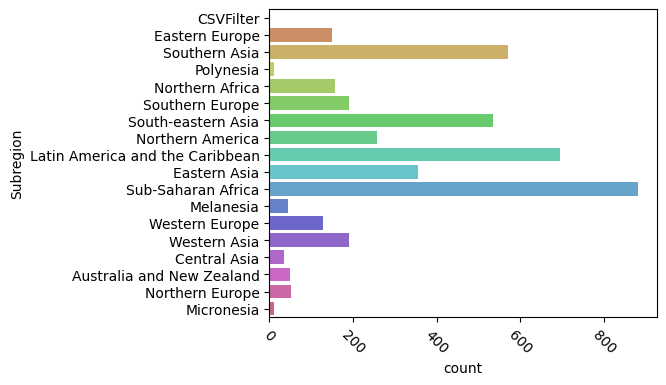



Count plot for: Region


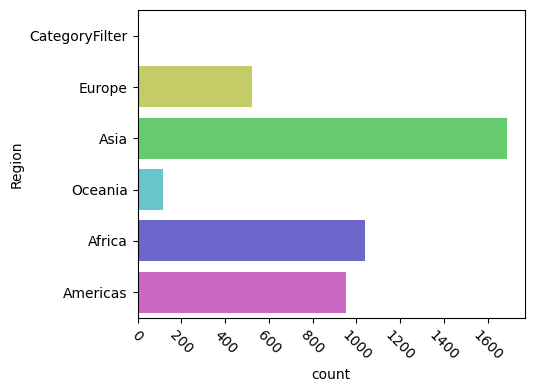



Count plot for: OFDA/BHA Response


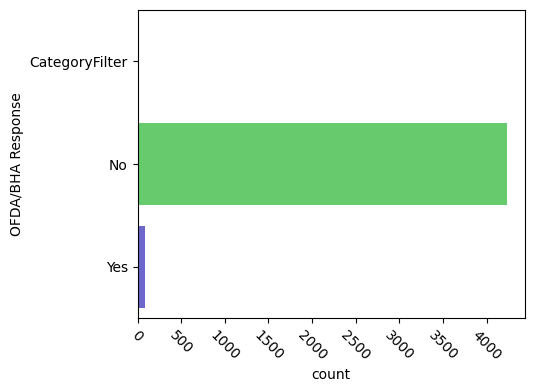



Count plot for: Appeal


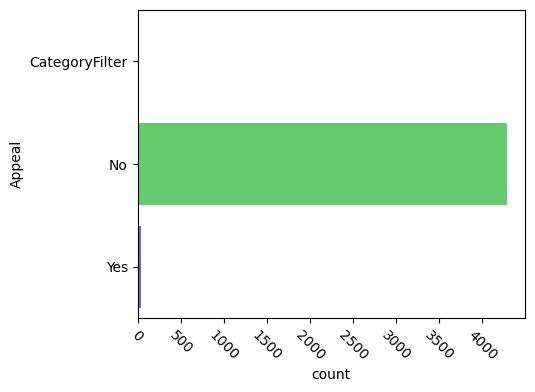



Count plot for: Declaration


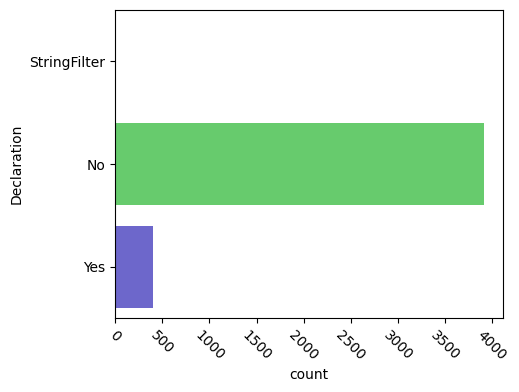



Count plot for: Total Damage


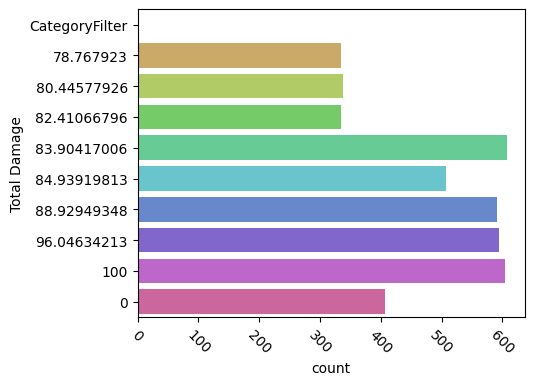

In [28]:
for i in cat:
    print("Count plot for:",i)
    plt.figure(figsize=(5,4))
    sns.countplot(df[i],palette='hls')
    plt.xticks(rotation=-45)
    plt.show()
    print("\n")

Pie plot for: Subregion


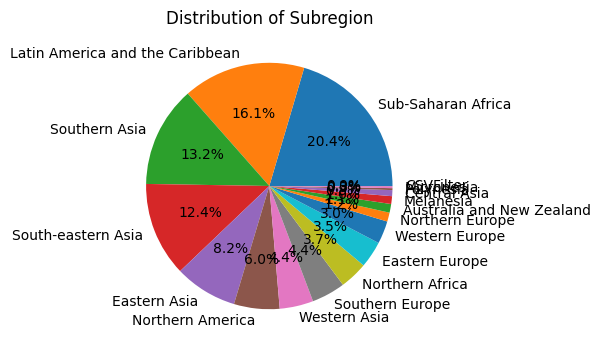



Pie plot for: Region


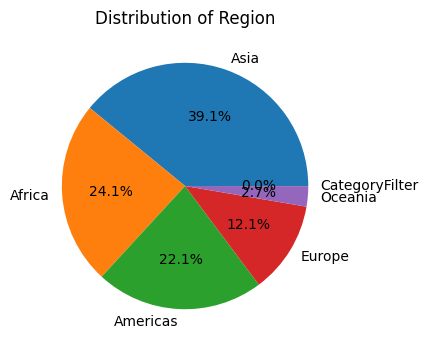



Pie plot for: OFDA/BHA Response


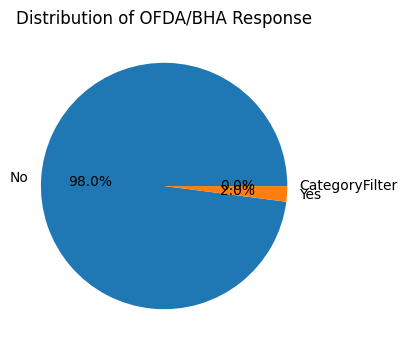



Pie plot for: Appeal


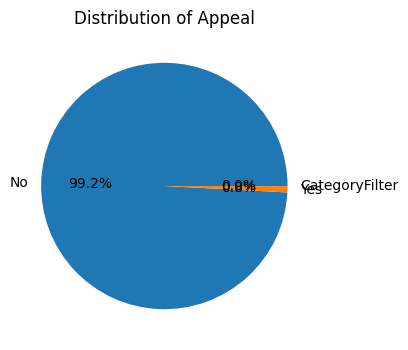



Pie plot for: Declaration


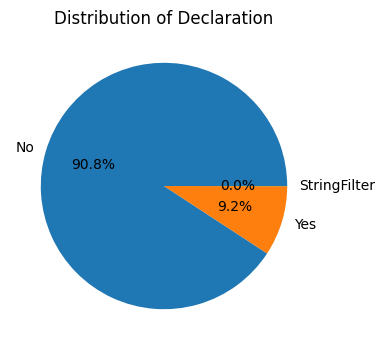



Pie plot for: Total Damage


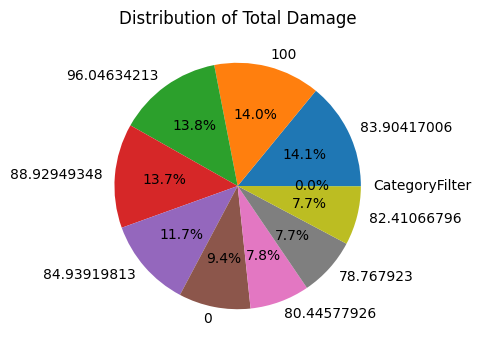

In [29]:
for i in cat:
    print("Pie plot for:",i)
    plt.figure(figsize=(5,4))
    df[i].value_counts().plot(kind='pie',autopct='%1.1f%%')
    plt.title('Distribution of '+i)
    plt.ylabel('')
    plt.show()
    print("\n")

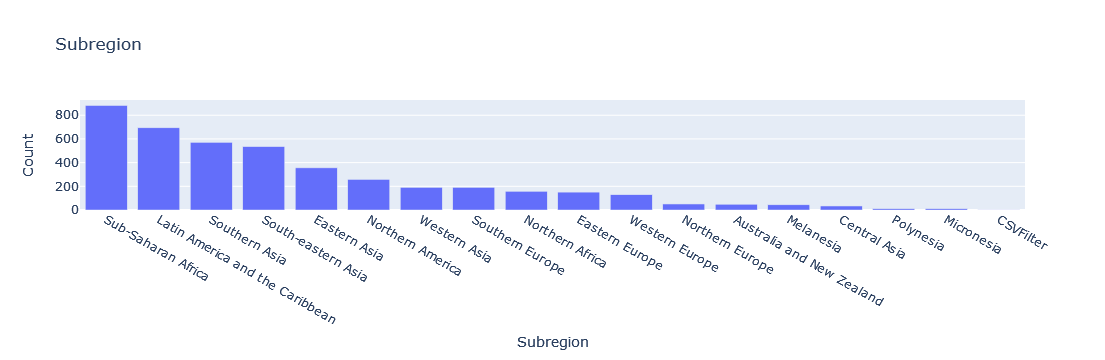

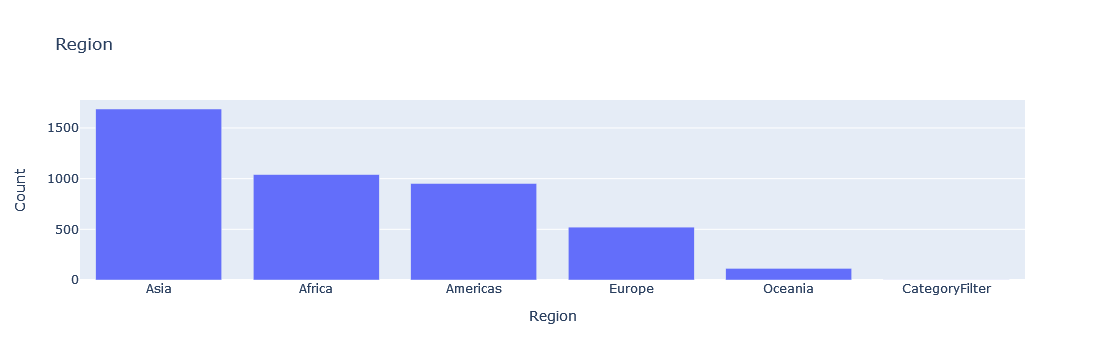

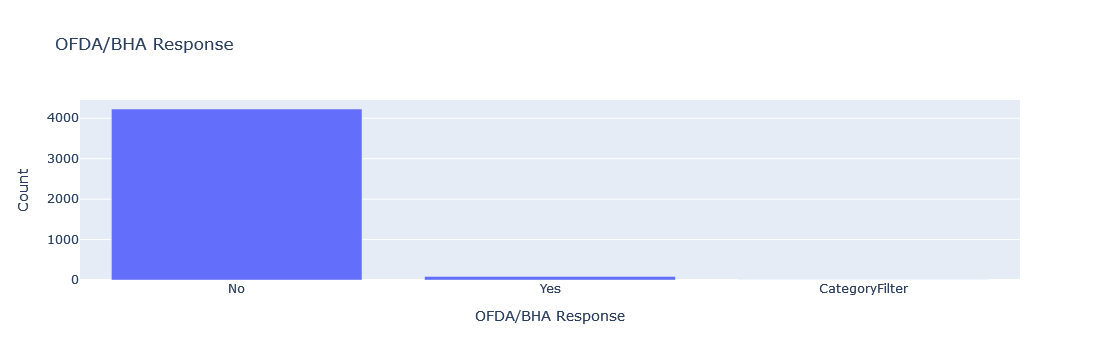

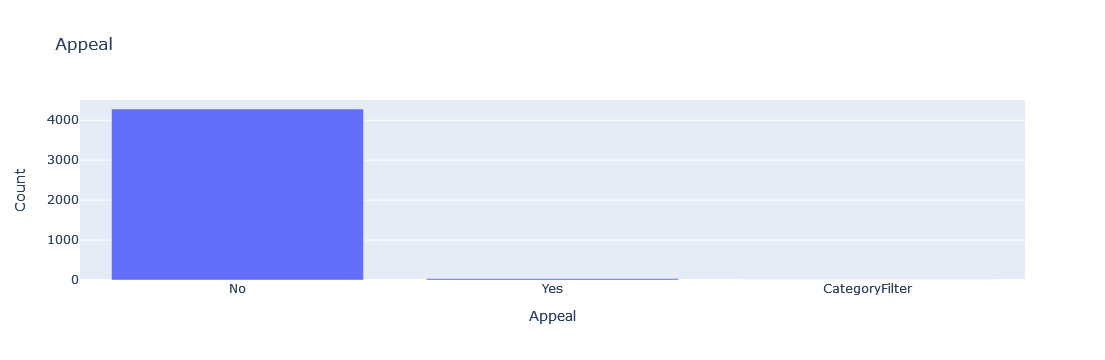

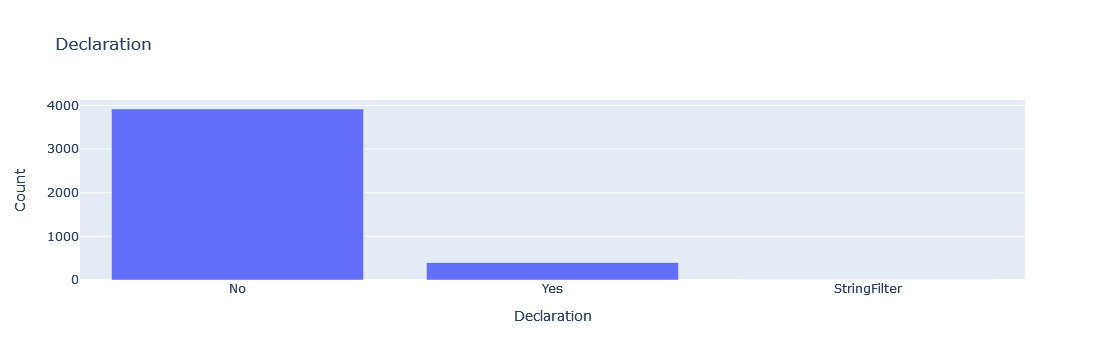

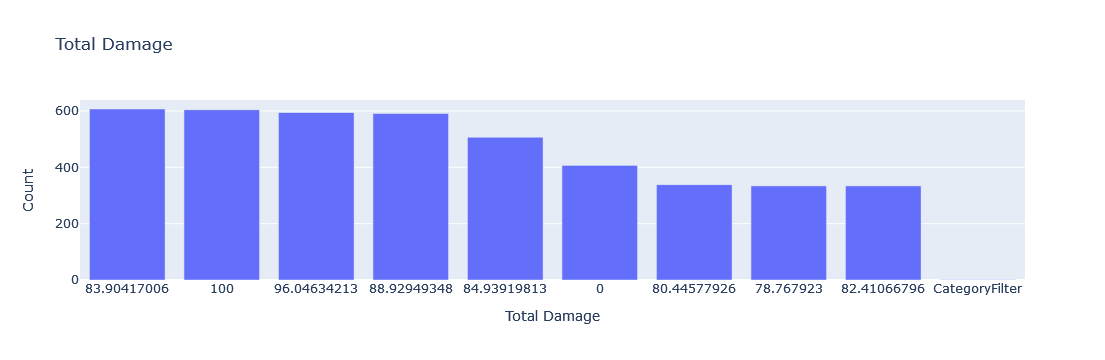

In [30]:
for i in cat:
    fig=go.Figure(
        data=[go.Bar(
            x=df[i].value_counts().index, 
            y=df[i].value_counts())])
    fig.update_layout(
    title=i,
    xaxis_title=i,
    yaxis_title='Count')
    fig.show()

Pie plot for: Subregion


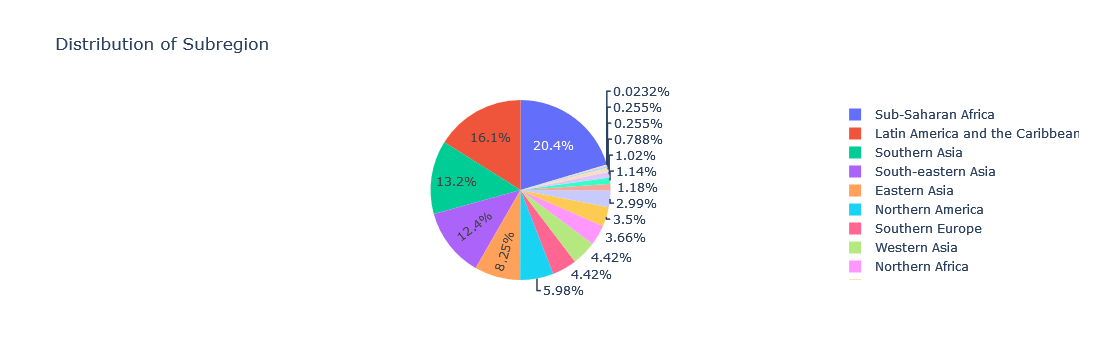



Pie plot for: Region


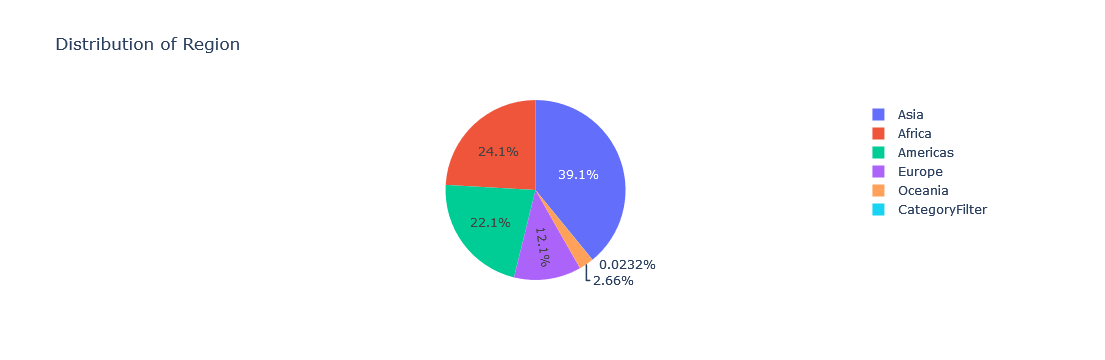



Pie plot for: OFDA/BHA Response


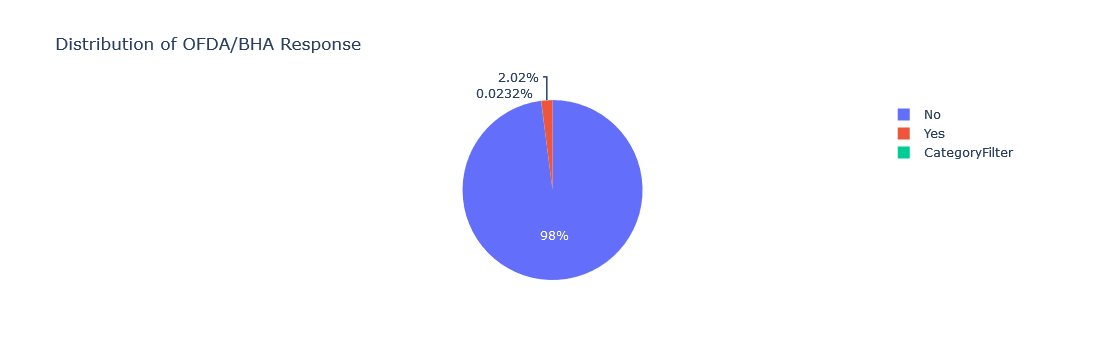



Pie plot for: Appeal


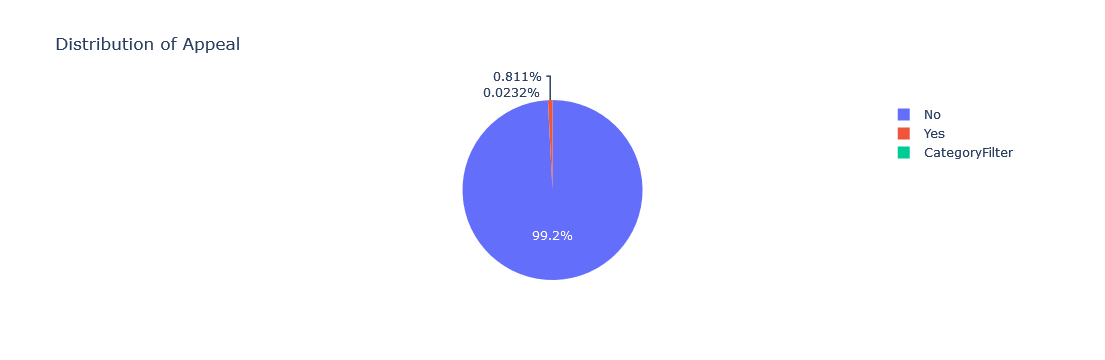



Pie plot for: Declaration


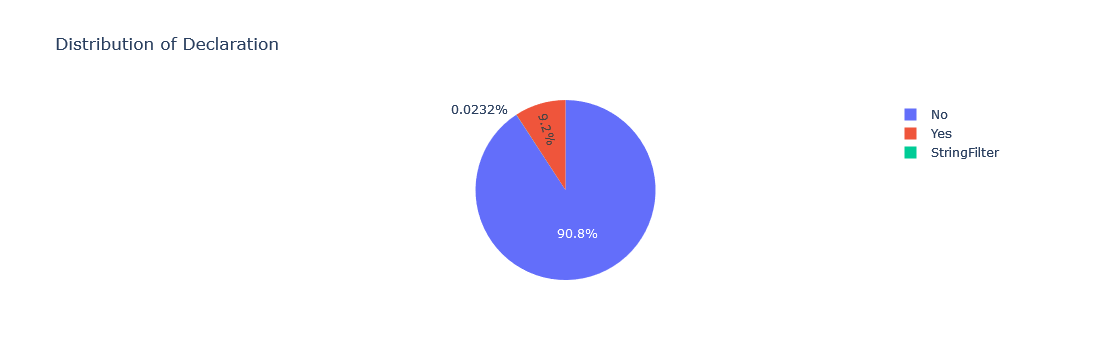



Pie plot for: Total Damage


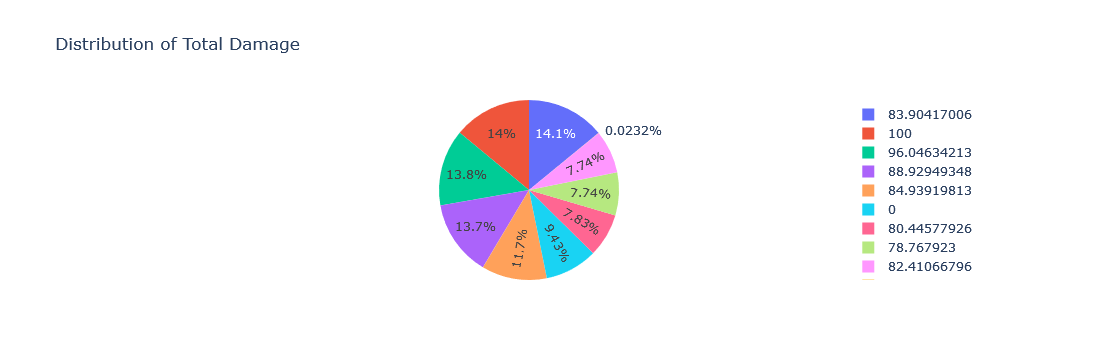

In [31]:
for i in cat:
    print('Pie plot for:',i)
    fig=px.pie(df,names=i,title='Distribution of '+i)
    fig.show()
    print("\n")

In [32]:
 print(df.nunique())

DisNo.                4317
Classification Key      56
Event Name             629
ISO                    202
Country                202
Subregion               18
Region                   6
Location              3951
Latitude              2972
Longitude             2884
OFDA/BHA Response        3
Appeal                   3
Declaration              3
Total Deaths          1305
No. Affected          1766
days                    61
Total Damage            10
dtype: int64


In [147]:
# num_cols = ['']
# for i in num_cols:
#     plt.figure(figsize=(10,6))
#     sns.histplot(df[i], kde=True, bins=20, palette='hls')
#     plt.xticks(rotation=0)
#     plt.show()

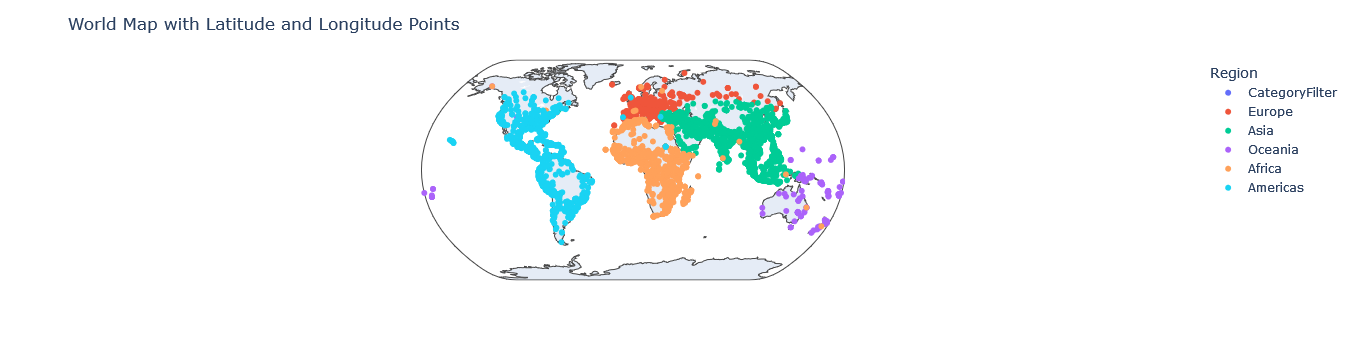

In [36]:
import plotly.express as px
import pandas as pd



# Create scatter geo map
fig = px.scatter_geo(df,
                     lat='Latitude',
                     lon='Longitude',
                     hover_name='Country',
                     color='Region',  # Use 'Region' to color points
                     projection='natural earth')  # World projection

fig.update_layout(title="World Map with Latitude and Longitude Points")
fig.show()
